### Explore Relationship between Covid Cases and Number of Tweets
This was run on Compute Canada platform

#### Come up with weekly state counts for depression, family, and stricter depression. Merge with death count df

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
   
def make_weekly_table(path):
    df = pd.read_csv(path)
    state_count_by_week = []
    total_weeks = 50
    for week in range(total_weeks):
        temp_df = pd.DataFrame(df[df['week']==week]['code'].value_counts())
        temp_df.reset_index(inplace=True)
        temp_df['week'] = week
        state_count_by_week.append(temp_df)
    weekly_state_counts = pd.concat(state_count_by_week)
    weekly_state_counts = weekly_state_counts.rename(columns={"index": "code", "code": "count"})
    return weekly_state_counts
    
weekly_state_counts_all = pd.read_csv('./Stored_Dataframes/weekly_state_counts_all.csv')
weekly_state_counts_family = make_weekly_table('./Stored_Dataframes/family_related_tweetdf.csv')
weekly_state_counts_depression = make_weekly_table('./Stored_Dataframes/depression_related_tweetdf.csv')
weekly_state_counts_strictdepression = make_weekly_table('./Stored_Dataframes/strict_depression_related_tweetdf.csv')

weekly_state_counts_deaths = pd.read_csv('./Stored_Dataframes/weekly_death_counts_by_state.csv')
weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['Week']>=0][weekly_state_counts_deaths['Week'] <= 49]
weekly_state_counts_deaths['All Cause'] = weekly_state_counts_deaths['All Cause'].apply(lambda x: int(re.sub("[^0-9]","",x)))
states = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
states = states[['code', 'state']]
state_to_code = dict(states[['state', 'code']].values)
code_to_state = dict(states[['code', 'state']].values)

def get_code(state):
    return state_to_code[state] if state in state_to_code else ''
def get_state(code):
    return code_to_state[code] if code in code_to_state else ''

weekly_state_counts_deaths['code'] = weekly_state_counts_deaths['Jurisdiction of Occurrence'].apply(get_code)
weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['code'] != '']

# weekly_state_counts_all = pd.merge(weekly_state_counts_all, weekly_state_counts_deaths, on=['week', 'code'])
# weekly_state_counts_all = weekly_state_counts_all.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
weekly_state_counts_all = pd.read_csv('./Stored_Dataframes/weekly_state_counts_all.csv')

# weekly_state_counts_family = pd.merge(weekly_state_counts_family, weekly_state_counts_deaths, on=['week', 'code'])
# weekly_state_counts_family = weekly_state_counts_family.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
weekly_state_counts_family = pd.read_csv('./Stored_Dataframes/weekly_state_counts_family.csv')

# weekly_state_counts_depression = pd.merge(weekly_state_counts_depression, weekly_state_counts_deaths, on=['week', 'code'])
# weekly_state_counts_depression = weekly_state_counts_depression.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
weekly_state_counts_depression = pd.read_csv('./Stored_Dataframes/weekly_state_counts_depression.csv')

# weekly_state_counts_strictdepression = pd.merge(weekly_state_counts_strictdepression, weekly_state_counts_deaths, on=['week', 'code'])
# weekly_state_counts_strictdepression = weekly_state_counts_strictdepression.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
weekly_state_counts_strictdepression = pd.read_csv('./Stored_Dataframes/weekly_state_counts_strictdepression.csv')

<ipython-input-1-968d1850f198>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['Week']>=0][weekly_state_counts_deaths['Week'] <= 49]


#### All Tweets vs Deaths for Any State

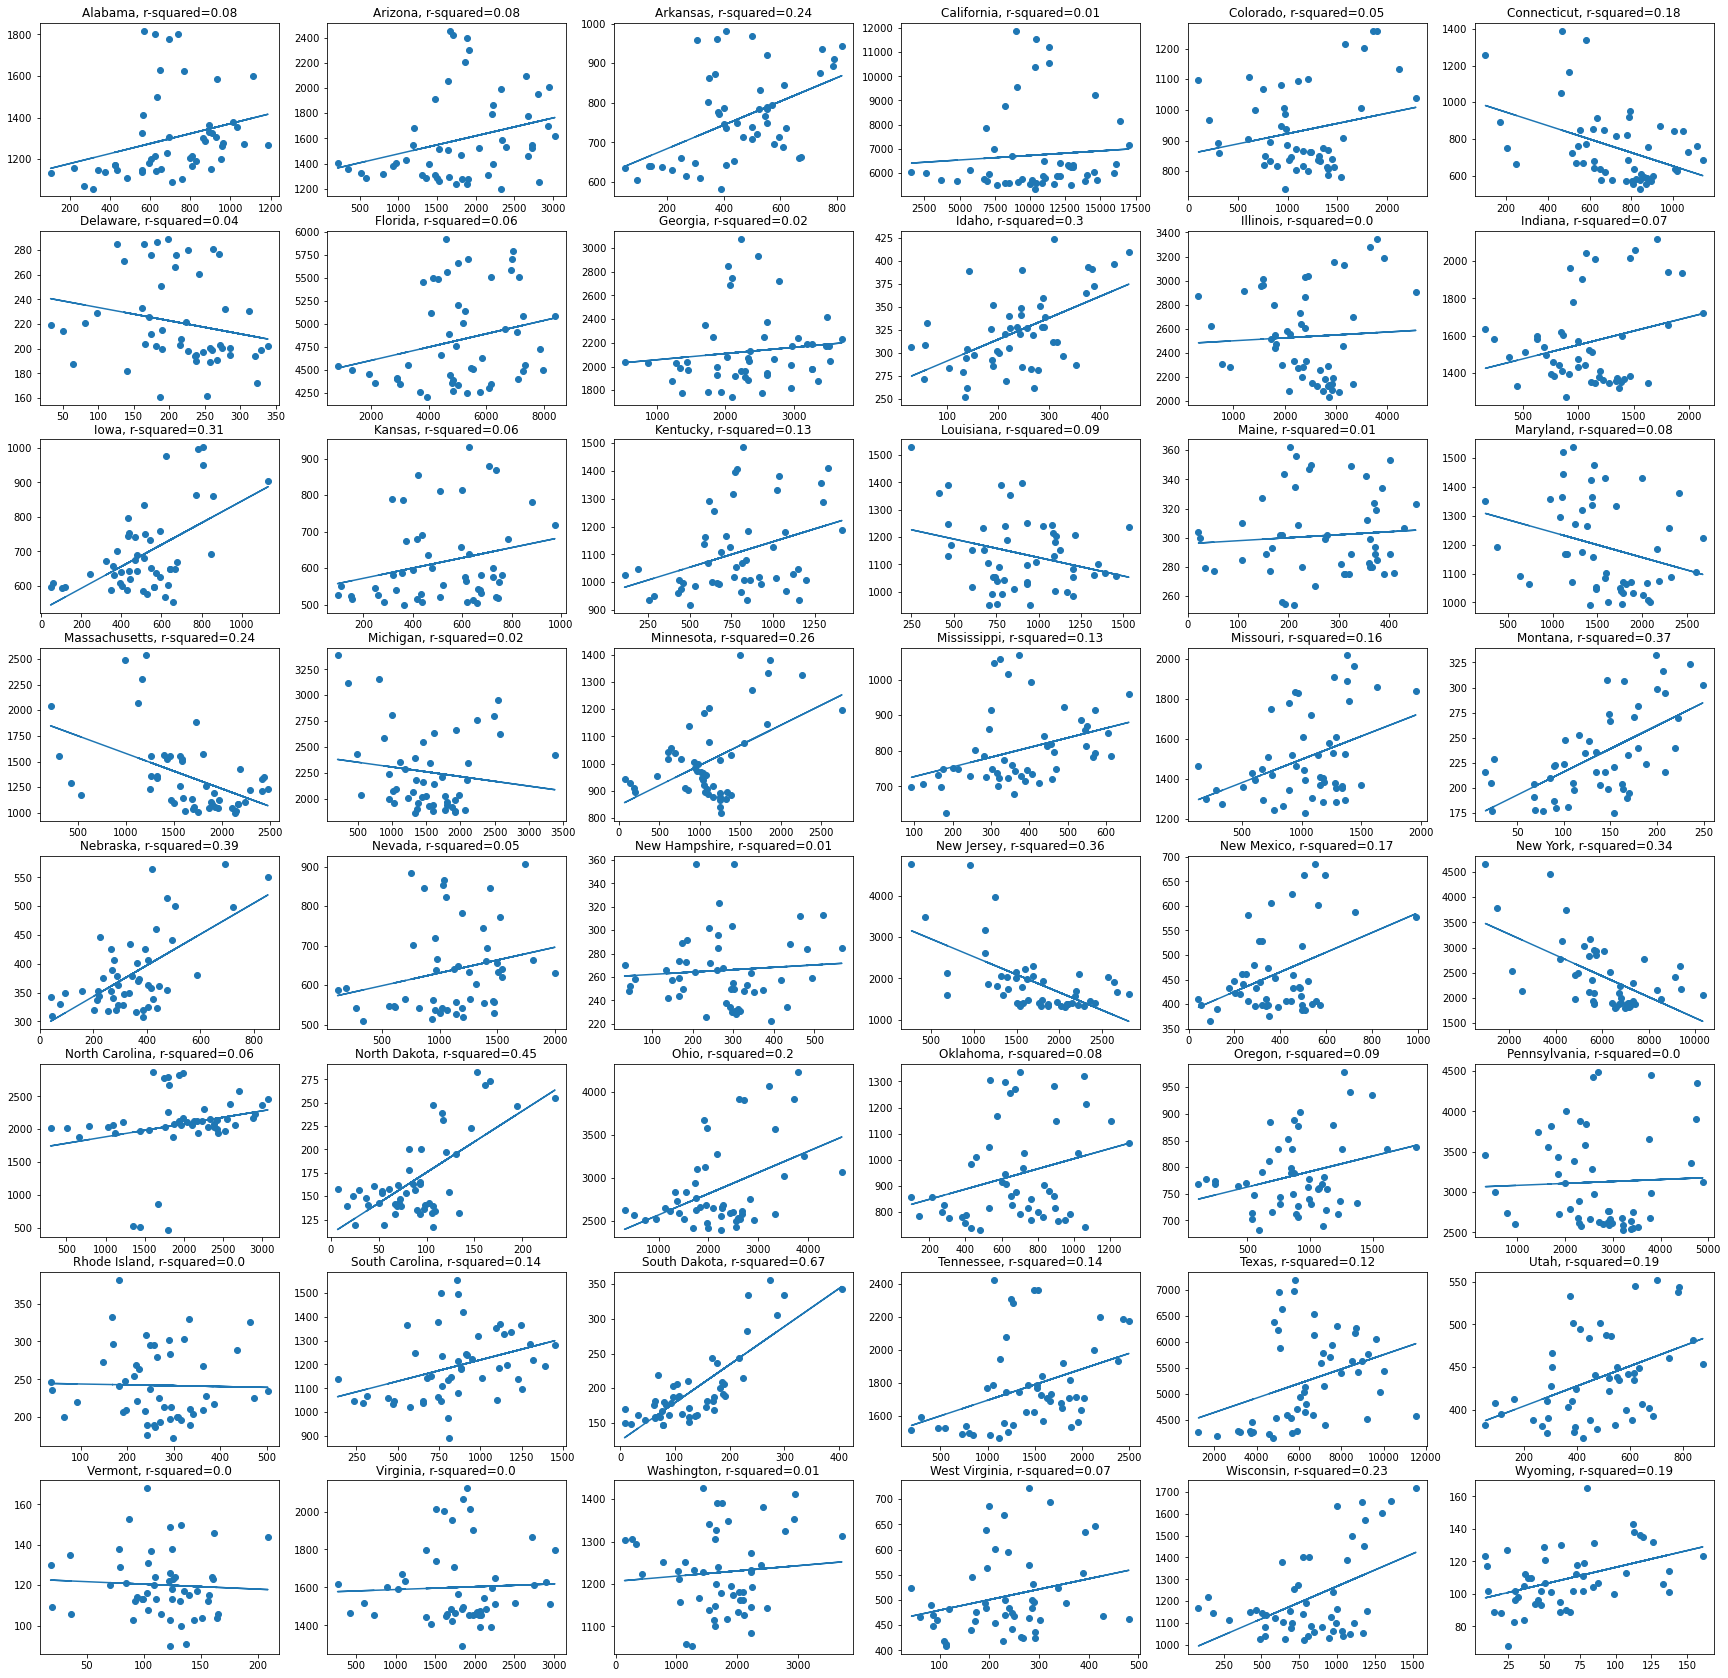

In [64]:
import numpy as np
from scipy import stats

plt.figure(figsize=(30, 30))

def twtplt(i, state):
    x = weekly_state_counts_all[weekly_state_counts_all['code']==get_code(state)]['count']
    y = weekly_state_counts_all[weekly_state_counts_all['code']==get_code(state)]['deaths']
    
    plt.subplot(8, 6, i)
    plt.scatter(x, y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.title('{}, r-squared={}'.format(state,round(r_value**2, 2)))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    
plt_states = list(state_to_code.keys())
plt_states.remove("Alaska")
plt_states.remove("Hawaii")

for i, state in enumerate(plt_states):
    twtplt(i+1, state)

#### Family Tweets vs Deaths for Any State

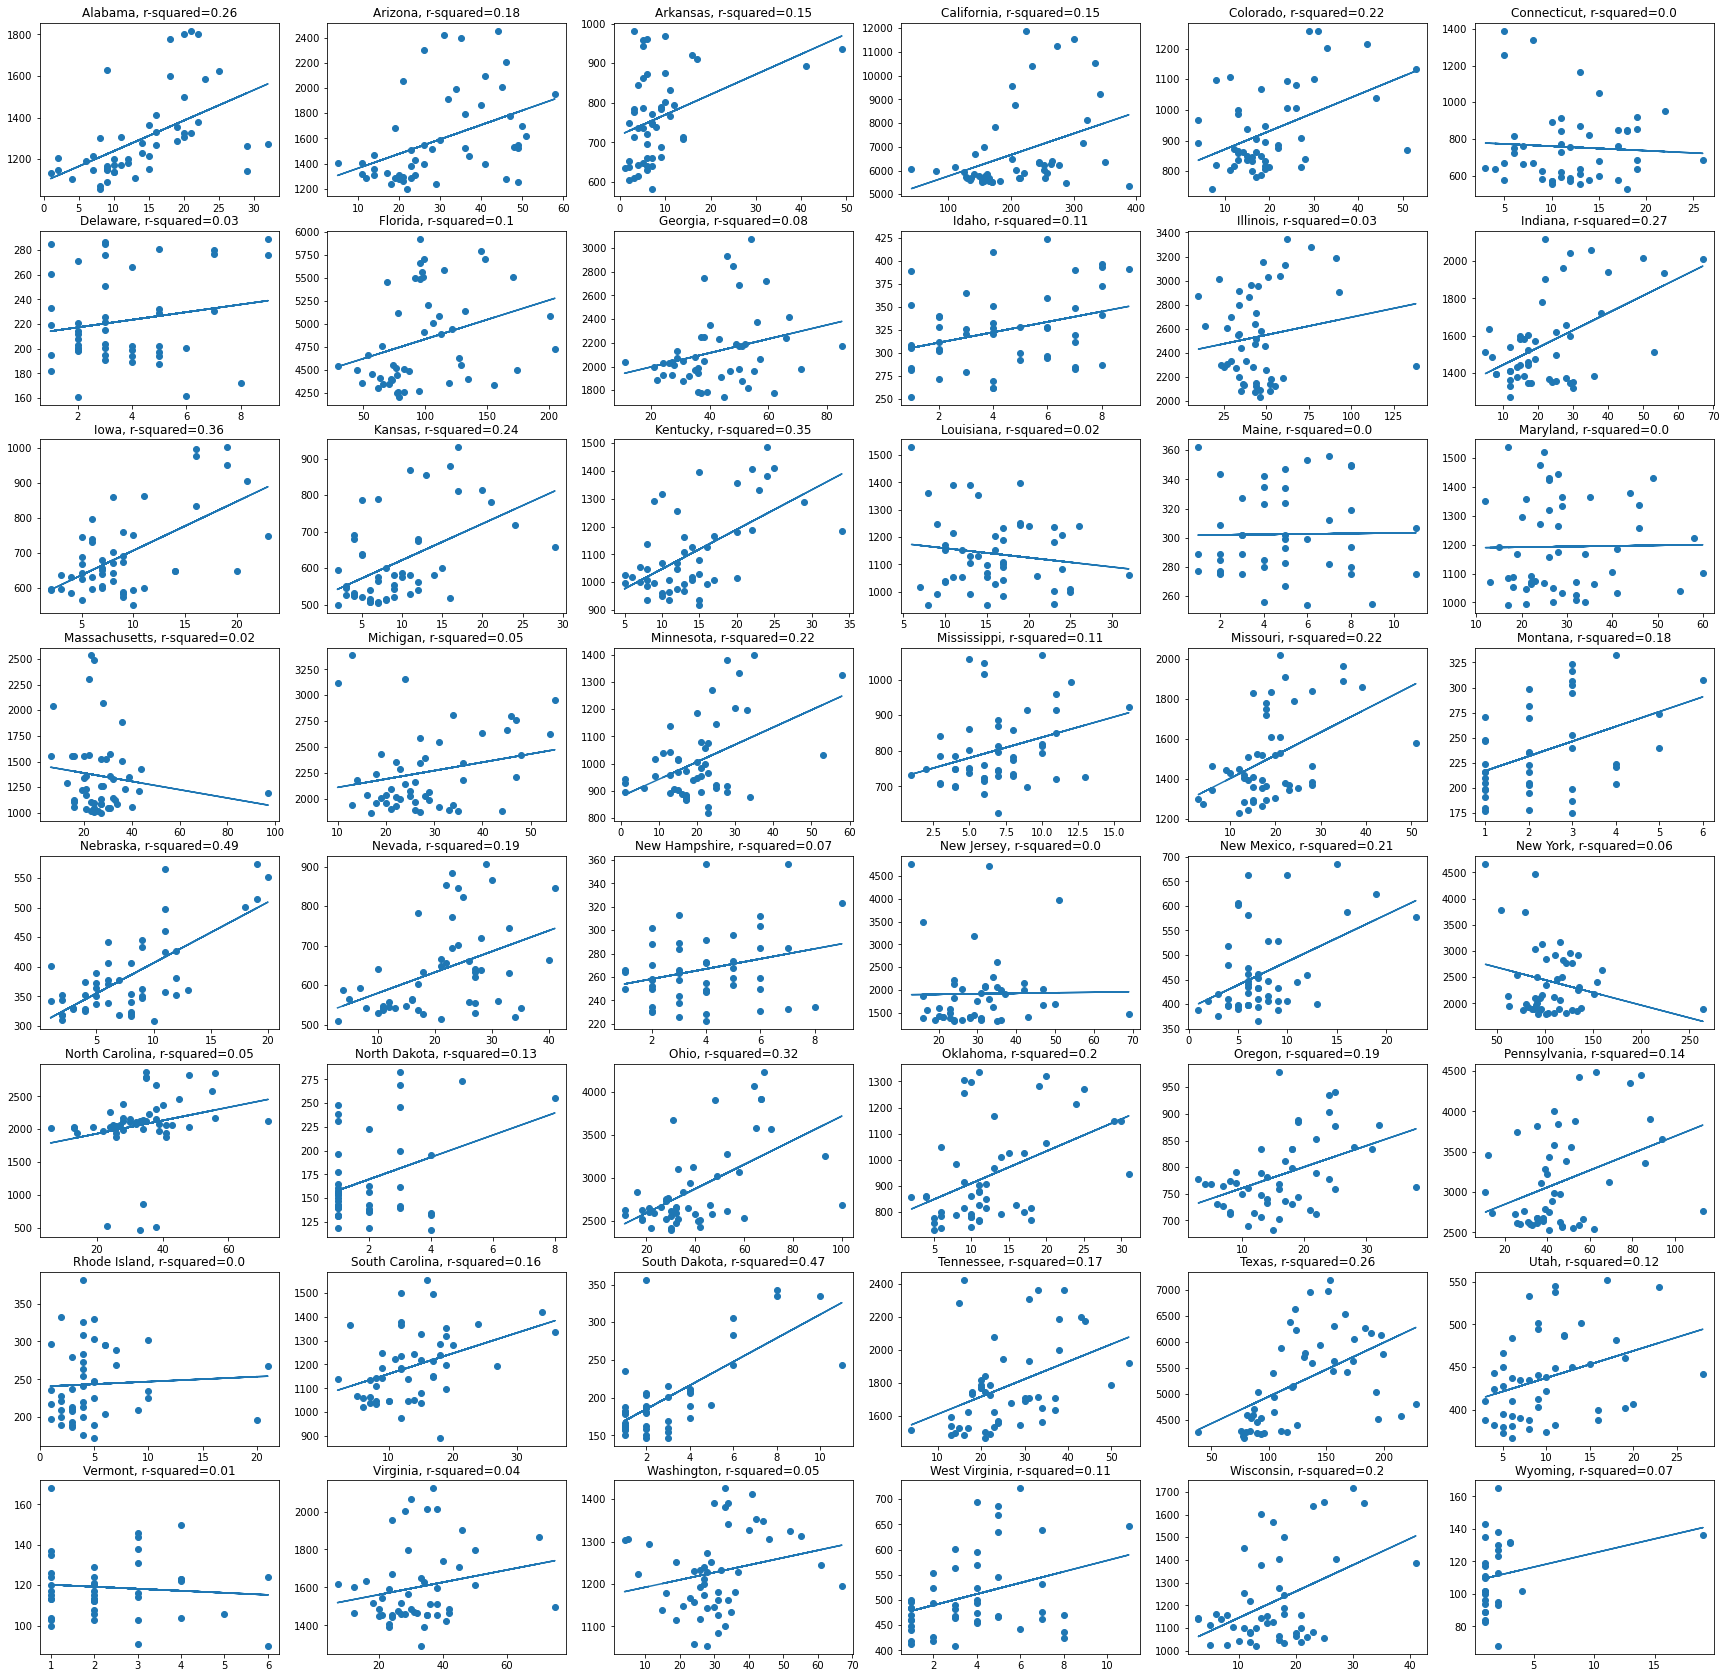

In [65]:
import numpy as np
from scipy import stats

plt.figure(figsize=(30, 30))

def twtplt(i, state):
    x = weekly_state_counts_family[weekly_state_counts_family['code']==get_code(state)]['count']
    y = weekly_state_counts_family[weekly_state_counts_family['code']==get_code(state)]['deaths']
    
    plt.subplot(8, 6, i)
    plt.scatter(x, y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.title('{}, r-squared={}'.format(state,round(r_value**2, 2)))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    
plt_states = list(state_to_code.keys())
plt_states.remove("Alaska")
plt_states.remove("Hawaii")

for i, state in enumerate(plt_states):
    twtplt(i+1, state)

#### Depression Tweets vs Deaths for Any State

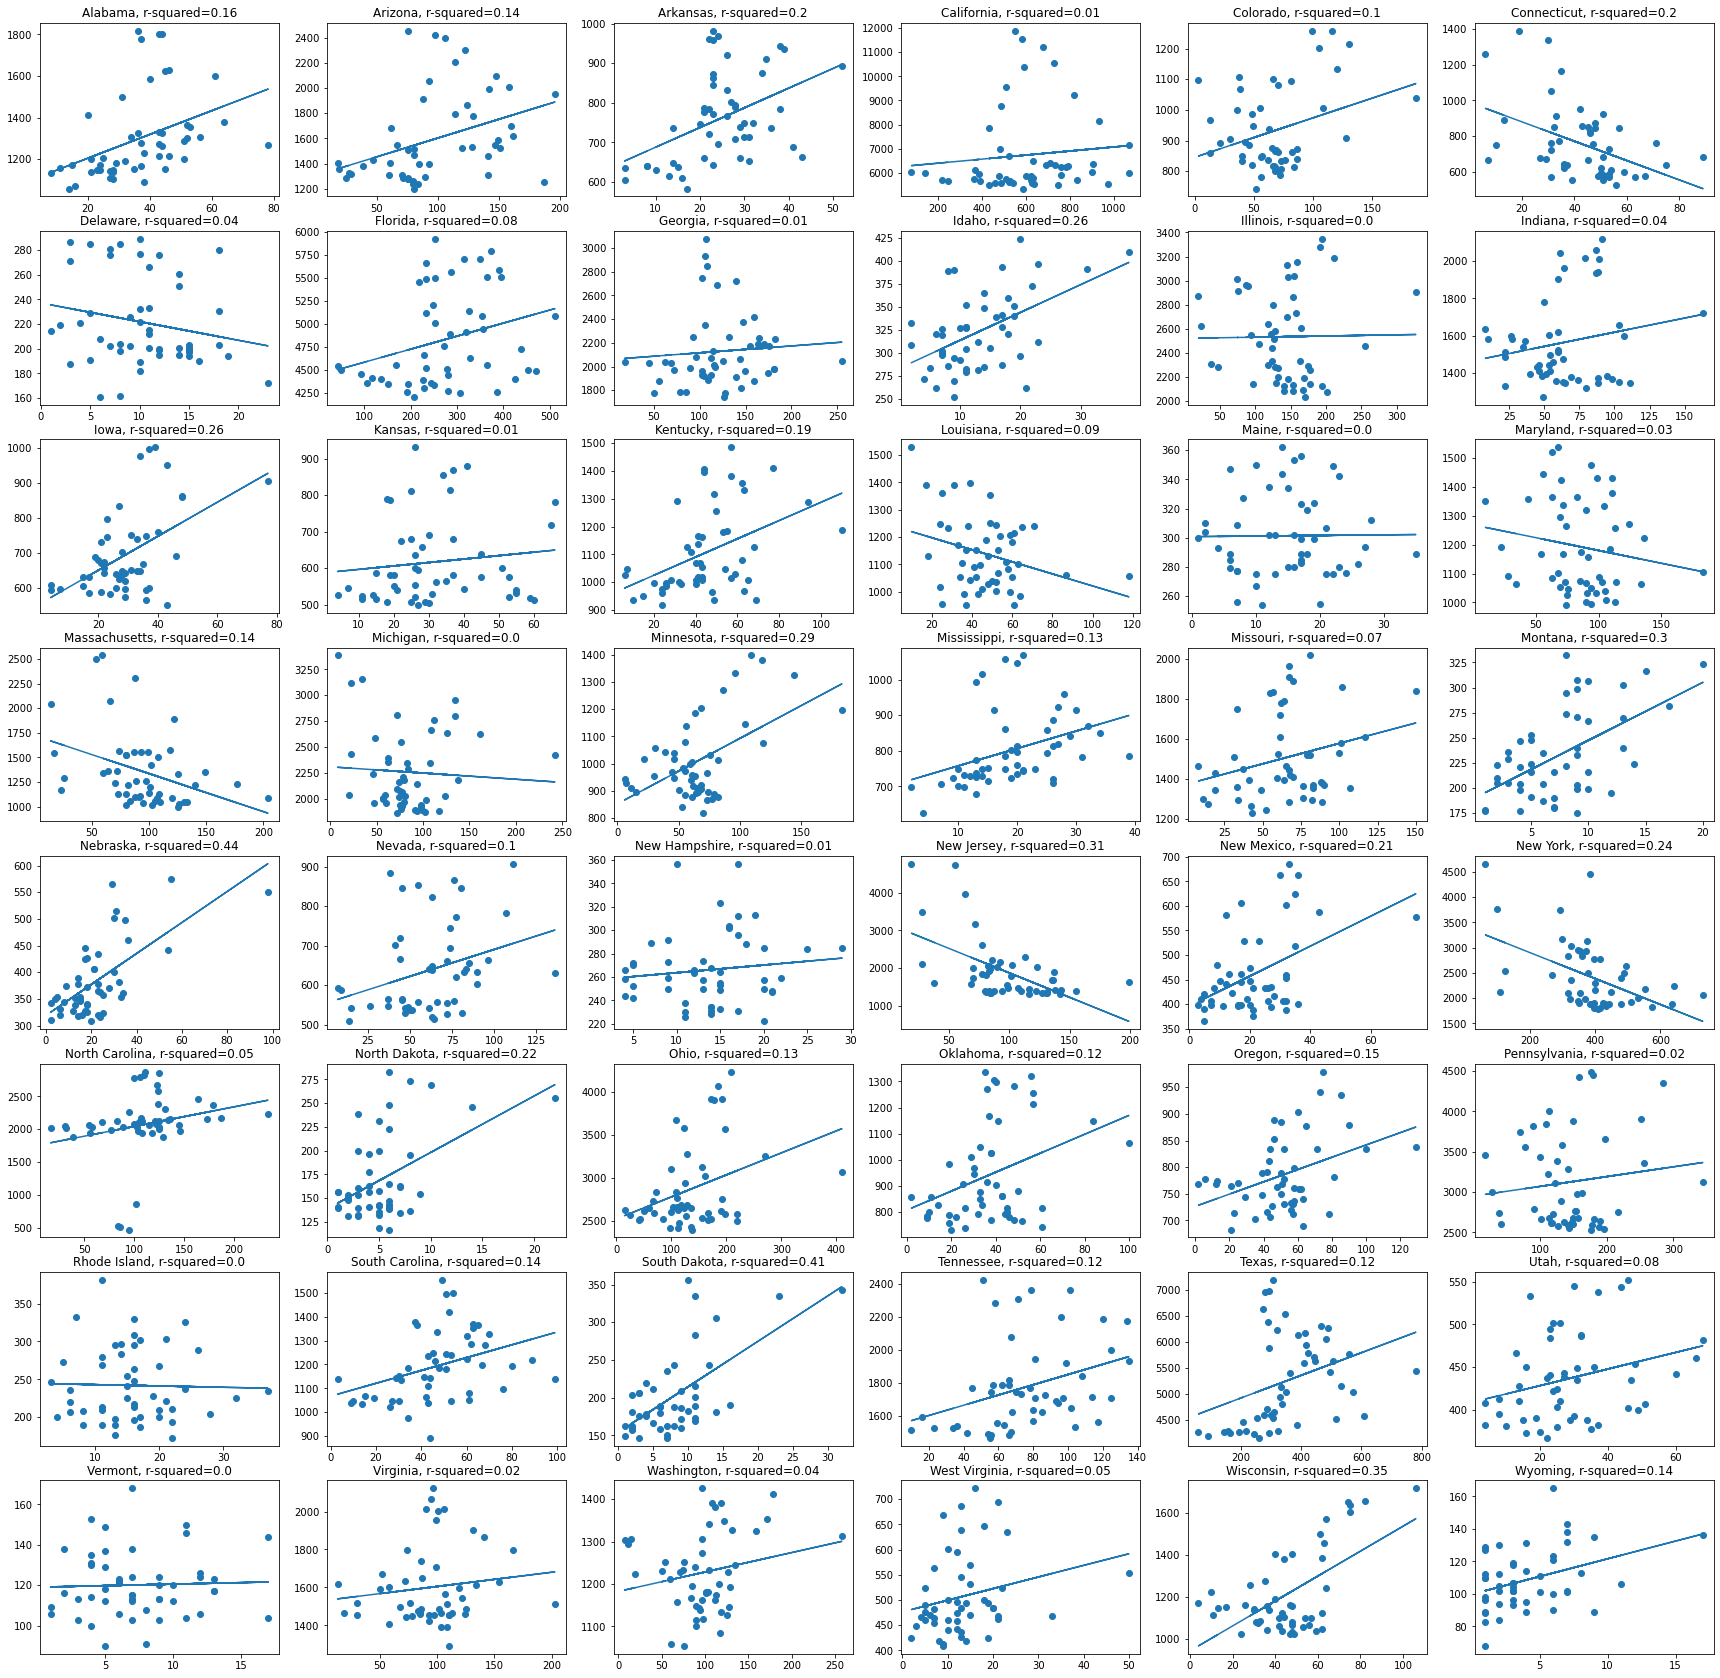

In [66]:
import numpy as np
from scipy import stats

plt.figure(figsize=(30, 30))

def twtplt(i, state):
    x = weekly_state_counts_depression[weekly_state_counts_depression['code']==get_code(state)]['count']
    y = weekly_state_counts_depression[weekly_state_counts_depression['code']==get_code(state)]['deaths']
    
    plt.subplot(8, 6, i)
    plt.scatter(x, y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.title('{}, r-squared={}'.format(state,round(r_value**2, 2)))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    
plt_states = list(state_to_code.keys())
plt_states.remove("Alaska")
plt_states.remove("Hawaii")

for i, state in enumerate(plt_states):
    twtplt(i+1, state)

#### Stricter Depression Tweets vs Deaths

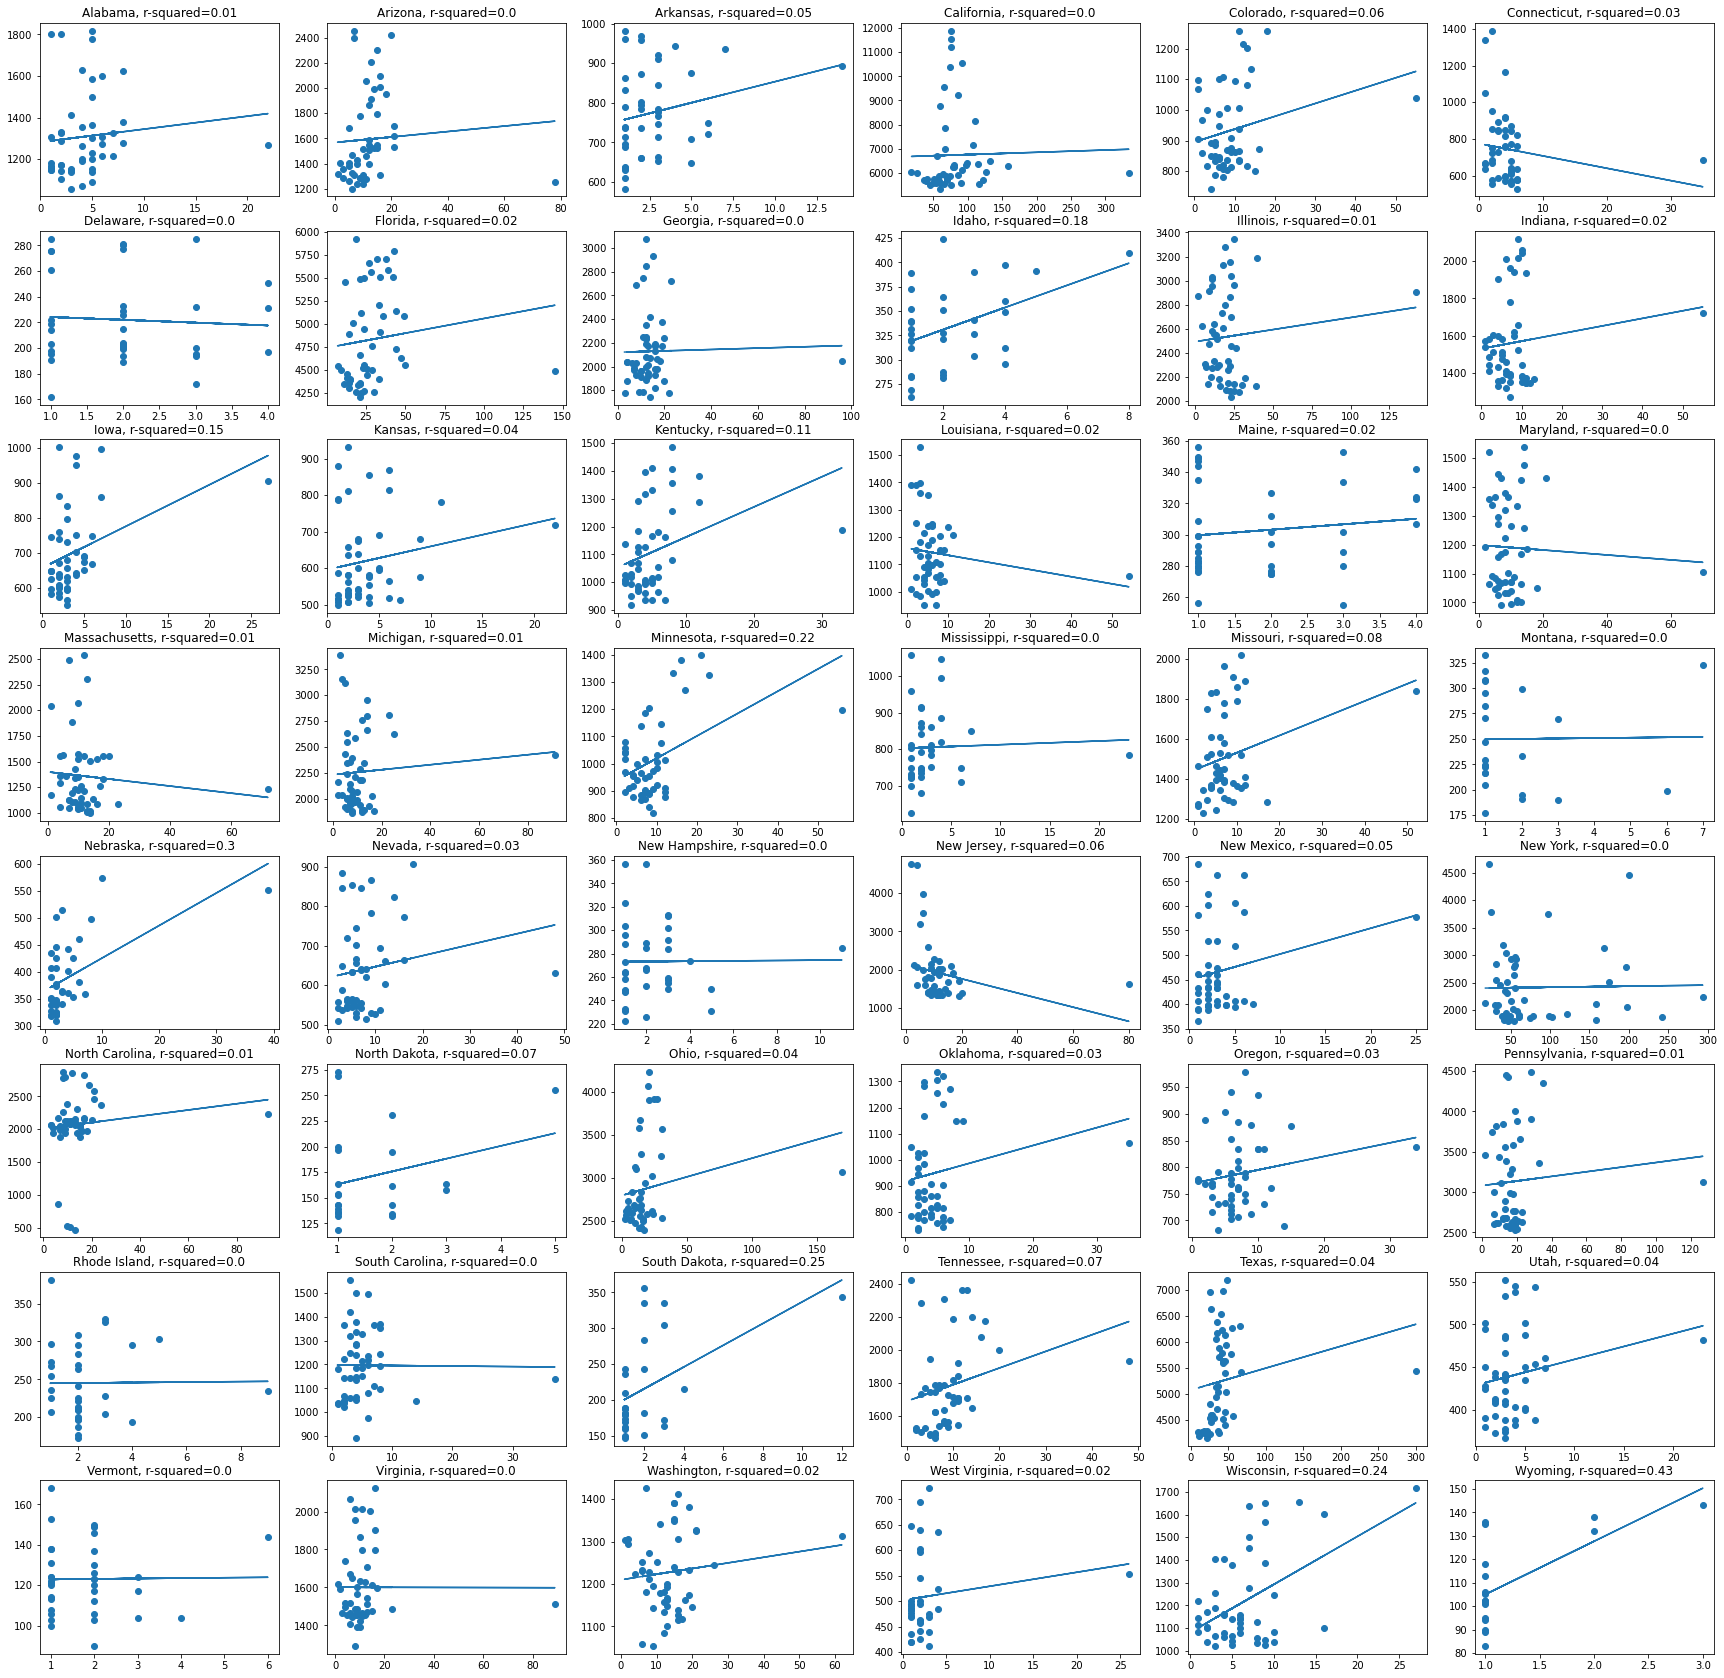

In [67]:
import numpy as np
from scipy import stats

plt.figure(figsize=(30, 30))

def twtplt(i, state):
    x = weekly_state_counts_strictdepression[weekly_state_counts_strictdepression['code']==get_code(state)]['count']
    y = weekly_state_counts_strictdepression[weekly_state_counts_strictdepression['code']==get_code(state)]['deaths']
    
    plt.subplot(8, 6, i)
    plt.scatter(x, y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.title('{}, r-squared={}'.format(state,round(r_value**2, 2)))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    
plt_states = list(state_to_code.keys())
plt_states.remove("Alaska")
plt_states.remove("Hawaii")

for i, state in enumerate(plt_states):
    twtplt(i+1, state)

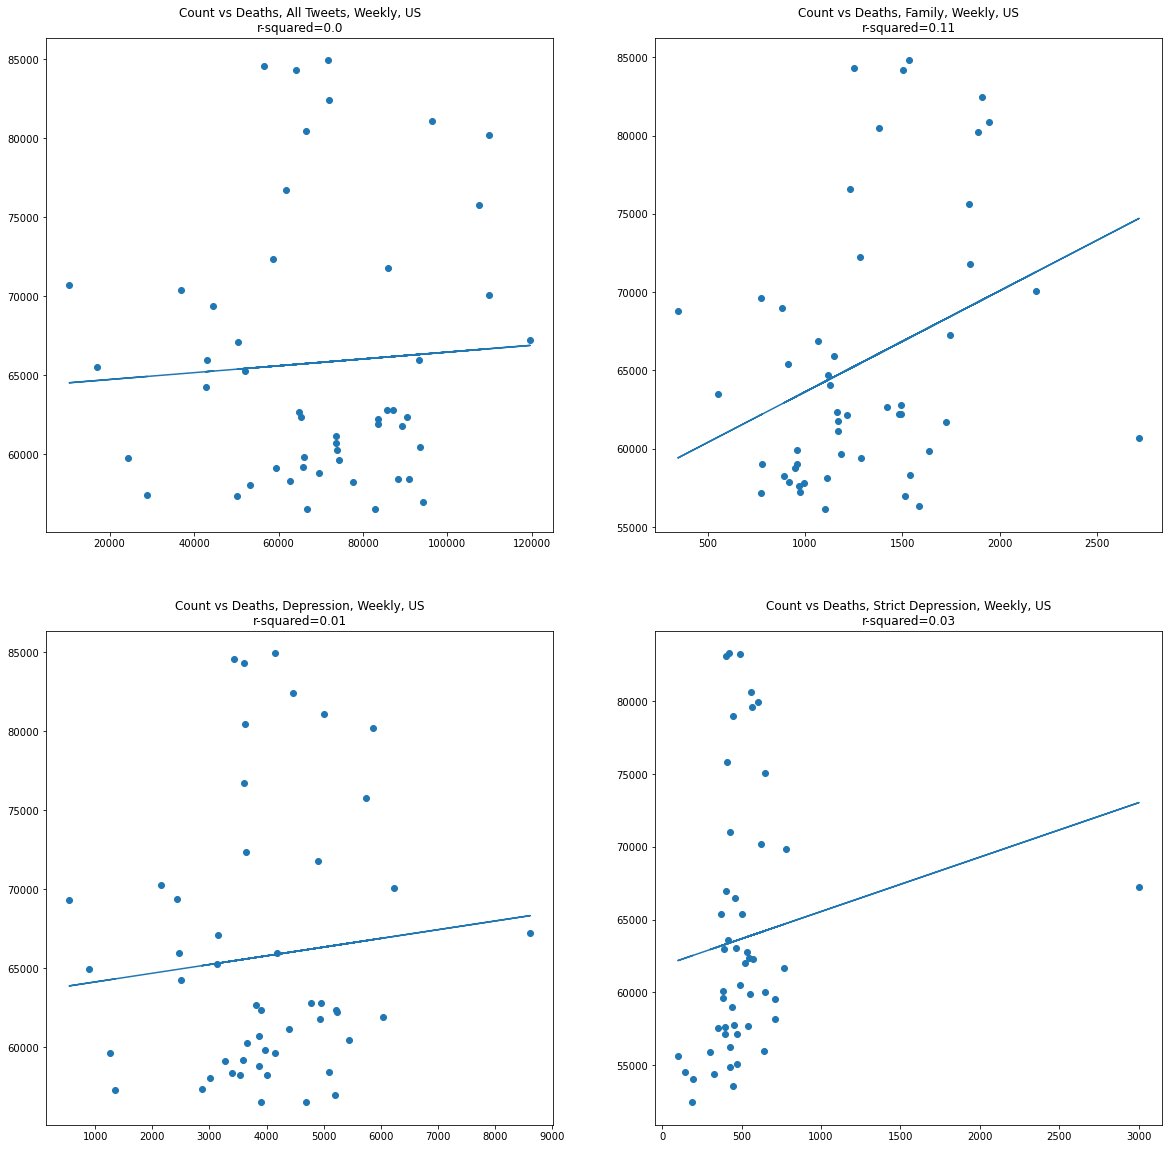

In [25]:
import numpy as np
from scipy import stats

us_weekly_totals = pd.DataFrame(weekly_state_counts_all.groupby(['week']).sum())[['count', 'deaths']]
us_weekly_family_totals = pd.DataFrame(weekly_state_counts_family.groupby(['week']).sum())[['count', 'deaths']]
us_weekly_depression_totals = pd.DataFrame(weekly_state_counts_depression.groupby(['week']).sum())[['count', 'deaths']]
us_weekly_strictdepression_totals = pd.DataFrame(weekly_state_counts_strictdepression.groupby(['week']).sum())[['count', 'deaths']]

plt.figure(figsize=(20, 20))

def usplt(i, twt_counts, death_counts, title):
    x = twt_counts
    y = death_counts
    
    plt.subplot(2, 2, i)
    plt.scatter(x, y)
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    plt.title('{}r-squared={}'.format(title,round(r_value**2, 2)))
    
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

usplt(1, us_weekly_totals['count'], us_weekly_totals['deaths'], "Count vs Deaths, All Tweets, Weekly, US\n")
usplt(2, us_weekly_family_totals['count'], us_weekly_family_totals['deaths'], "Count vs Deaths, Family, Weekly, US\n")
usplt(3, us_weekly_depression_totals['count'], us_weekly_depression_totals['deaths'], "Count vs Deaths, Depression, Weekly, US\n")
usplt(4, us_weekly_strictdepression_totals['count'], us_weekly_strictdepression_totals['deaths'], "Count vs Deaths, Strict Depression, Weekly, US\n")

#### Merge weekly state count df with population to obtain normalized counts

In [70]:
populations = pd.read_excel("./Data/populations.xlsx")
populations['code'] = populations['State'].apply(get_code)
del populations["Unnamed: 2"]
populations

def merge_with_population(df):
    rdf = pd.merge(df, populations, on="code")
    del rdf['State']
    rdf['normalized_counts'] = rdf['count']/rdf['July 2019 Estimate']
    return rdf
weekly_state_counts_family = merge_with_population(weekly_state_counts_family)
weekly_state_counts_depression = merge_with_population(weekly_state_counts_depression)
weekly_state_counts_strictdepression = merge_with_population(weekly_state_counts_strictdepression)
weekly_state_counts_family

,code,count,week,state,deaths,July 2019 Estimate,normalized_counts
0,CA,136,0,California,5681,39512223,3.441973e-06
1,CA,129,1,California,5689,39512223,3.264813e-06
2,CA,80,2,California,5986,39512223,2.024690e-06
3,CA,41,3,California,6047,39512223,1.037654e-06
4,CA,110,4,California,6131,39512223,2.783949e-06
...,...,...,...,...,...,...,...
2323,MT,1,44,Montana,247,1068778,9.356480e-07
2324,MT,3,45,Montana,199,1068778,2.806944e-06
2325,MT,2,46,Montana,216,1068778,1.871296e-06
2326,MT,1,48,Montana,210,1068778,9.356480e-07


#### Store weekly state count dfs from above to use in StatePlot locally (since plotly doesn't work here)

In [77]:
weekly_state_counts_all.to_csv('./Stored_Dataframes/weekly_state_counts_all.csv')
weekly_state_counts_family.to_csv('./Stored_Dataframes/weekly_state_counts_family.csv')
weekly_state_counts_depression.to_csv('./Stored_Dataframes/weekly_state_counts_depression.csv')
weekly_state_counts_strictdepression.to_csv('./Stored_Dataframes/weekly_state_counts_strictdepression.csv')